In [68]:
import pandas as pd
import numpy as np
winkelr = pd.read_excel("md_winkelrichtgröße.xlsx")
winkelr = winkelr.iloc[:,:]
#print(lange_spule.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

mittelwert = np.mean(winkelr)
#print(mittelwert)

def winkelricht(F, r, phi): #Phi in Winkel
    D = (F*r) / (phi * (np.pi) / 180)
    return D

arr = pd.DataFrame(winkelr).to_numpy()
phi = arr[:,0]
F = arr[:,1]

D = winkelricht(F,0.2,phi)
D = np.transpose(D)
mittelwertD = np.mean(D)
standartabw = np.std(D)
#print(mittelwertD)
print(standartabw)
#np.savetxt('WinkelrichtgrößeWerte.txt', D, fmt='%f')

0.002952928161464375


In [17]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
#print(abstand.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))
arr = pd.DataFrame(abstand).to_numpy()

arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]
arr = np.c_[arr, r2, T2]

arr =  pd.DataFrame(data=arr)
print(arr.to_latex(index = False, column_format= "c c c c", na_rep = "-", float_format="%.3f"))


\begin{tabular}{c c c c}
\toprule
    0 &     1 &     2 &      3 \\
\midrule
0.050 & 2.750 & 0.003 &  7.562 \\
0.075 & 3.100 & 0.006 &  9.610 \\
0.100 & 3.800 & 0.010 & 14.440 \\
0.125 & 4.100 & 0.016 & 16.810 \\
0.150 & 4.750 & 0.022 & 22.562 \\
0.175 & 5.300 & 0.031 & 28.090 \\
0.200 & 5.800 & 0.040 & 33.640 \\
0.225 & 6.600 & 0.051 & 43.560 \\
0.250 & 7.150 & 0.062 & 51.123 \\
0.275 & 7.800 & 0.076 & 60.840 \\
\bottomrule
\end{tabular}



a = 724.885 ± 10.115
b = 5.945 ± 0.400


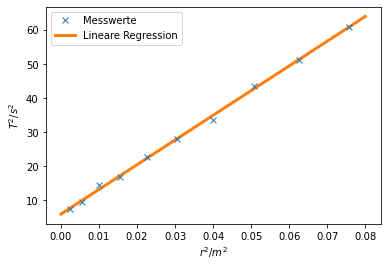

In [81]:
# Lineare Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
np.set_printoptions(suppress=True)

#Daten
abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
arr = pd.DataFrame(abstand).to_numpy()
arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]

#Ausgleichsrechnung

params, covariance_matrix = np.polyfit(r2, T2, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')


x_plot = np.linspace(0, 0.08)
plt.plot(r2,T2,'x', label="Messwerte", zorder=2)
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
    zorder=1,
)
plt.xlabel(r'$r^2 / m^2$')
plt.ylabel(r'$T^2 / s^2$')
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('Lineare Regression.pdf'):
    os.remove('Lineare Regression.pdf')
plt.savefig('pictures/Lineare Regression.pdf')

In [77]:
import pandas as pd
import numpy as np
zylper = pd.read_excel("md_periodendauer_zylinder.xlsx")
zylper = zylper.iloc[:,:]
#print(zylper.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

arr = pd.DataFrame(zylper).to_numpy()
Twerte = arr[:,1]
print("Mittelwert: ", np.mean(Twerte))
print("Standartabweichung: ", np.std(Twerte))

[0.8  0.75 0.76 0.72 0.75 0.74 0.74 0.79 0.75 0.78]
Mittelwert:  0.7580000000000001
Standartabweichung:  0.02357965224510321


In [82]:
import pandas as pd
import numpy as np
kugper = pd.read_excel("md_periodendauer_kugel.xlsx")
kugper = kugper.iloc[:,:]
print(kugper.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

arr = pd.DataFrame(kugper).to_numpy()
Twerte = arr[:,1]
print("Mittelwert: ", np.mean(Twerte))
print("Standartabweichung: ", np.std(Twerte))

\begin{tabular}{c c}
\toprule
 Unnamed: 0 &  T / \textbackslash second \\
\midrule
          1 &        1.770 \\
          2 &        1.900 \\
          3 &        1.850 \\
          4 &        1.800 \\
          5 &        1.800 \\
          6 &        1.800 \\
          7 &        1.900 \\
          8 &        1.850 \\
          9 &        1.880 \\
         10 &        1.870 \\
\bottomrule
\end{tabular}

Mittelwert:  1.842
Standartabweichung:  0.044226688774991925


In [20]:
#Abmessungen Puppe

import pandas as pd
import numpy as np
puppeabm = pd.read_excel("md_abmessung_puppe.xlsx")
#puppeabm = puppeabm.iloc[:,5:]
#print(puppeabm.to_latex(index = False))

arr = pd.DataFrame(puppeabm).to_numpy()
Maße = arr[1:,1:]
mittelarr = np.zeros(2)
for i in range(7):
    #print("Mittelwert: ", np.mean(Maße[:,i]))
    #print("Standartabweichung: ", np.std(Maße[:,i]))
    vec = [np.mean(Maße[:,i]), np.std(Maße[:,i])]
    mittelarr = np.c_[mittelarr, vec]

mittelarr = mittelarr[:,1:]
mittelarr =  pd.DataFrame(data=mittelarr)
print(mittelarr.to_latex(index = False, float_format="%.3f"))


\begin{tabular}{rrrrrrr}
\toprule
    0 &     1 &     2 &     3 &     4 &     5 &     6 \\
\midrule
1.710 & 1.498 & 1.294 & 1.306 & 3.938 & 3.746 & 2.676 \\
0.109 & 0.157 & 0.063 & 0.081 & 0.373 & 0.849 & 0.245 \\
\bottomrule
\end{tabular}



In [71]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
################################################# Jetzt wirds eklig ########################################################
############################################# Volumenberechnung der Gliedmaßen #############################################

# Formeln

def volzyl(r,h):                                    #Volumen Zylinder
    rtn  = np.pi * r**2 * h
    return rtn

def fehlervolzyl(r, h, rabw):                       #Fehler vom Volumen des Zylinders
    feh = np.sqrt((2 * np.pi * h * r * rabw)**2)
    return feh

def volkug(r):                                      #Volumen Kugel
    rtn = (4/3) * np.pi * r**3
    return rtn

def fehlervolkug(r, rabw):                          #Fehler vom Volumen der Kugel
    feh = np.sqrt((r * np.pi * r**2 * rabw)**2)

#Daten importierten

import pandas as pd
import numpy as np
puppeabm = pd.read_excel("md_abmessung_puppe.xlsx")

arr = pd.DataFrame(puppeabm).to_numpy()
Maße = arr[1:,1:]
mittelarr = np.zeros(2)
for i in range(7):
    #print("Mittelwert: ", np.mean(Maße[:,i]))
    #print("Standartabweichung: ", np.std(Maße[:,i]))
    vec = [np.mean(Maße[:,i]), np.std(Maße[:,i])]
    mittelarr = np.c_[mittelarr, vec]

mittelarr = mittelarr[:,1:]             # Überflüssige Zeile loswerden
mittelarr = mittelarr * 10**(-2)        # In Meter umwandeln

hvec = [0.1433, 0.1433, 0.1302, 0.1302, 0.0981, 0.0981, 0.0471]
V1 = np.zeros(1)
Vfeh  = np.zeros(1)
for i in range(np.size(hvec)):
    V1 = np.c_[V1, volzyl(mittelarr[0,i], hvec[i])]
    Vfeh = np.c_[Vfeh, fehlervolzyl(mittelarr[0,i], hvec[i], mittelarr[1,i])]
V1 = V1[:,1:]
Vfeh = Vfeh[:,1:]
vec = np.concatenate((V1, Vfeh), axis=0)

vec =  pd.DataFrame(data=vec)
vec = vec * 100000
print(vec.to_latex(index = False), np.set_printoptions(suppress=False))

\begin{tabular}{rrrrrrr}
\toprule
        0 &         1 &        2 &        3 &         4 &         5 &         6 \\
\midrule
13.164012 & 10.102287 & 6.849035 & 6.976654 & 47.793662 & 43.246845 & 10.596026 \\
 1.675321 &  2.110987 & 0.668167 & 0.864282 &  9.056683 & 19.592513 &  1.940859 \\
\bottomrule
\end{tabular}
 None
